In [1]:
import tensorflow as tf
print(tf.__version__)

2023-06-16 14:08:13.215181: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


2.4.1


In [4]:
!nvidia-smi

Fri Jun 16 14:09:15 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 515.76       Driver Version: 515.76       CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:B3:00.0  On |                  N/A |
| 18%   44C    P8    15W / 215W |    638MiB /  8192MiB |      2%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [6]:
t = [1,2,3,4,5,6,7,8,9,10,11,12]
tensor = tf.constant(t)

2023-06-16 14:47:37.851592: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-06-16 14:47:37.853720: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-06-16 14:47:37.891981: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:b3:00.0 name: NVIDIA GeForce RTX 2080 computeCapability: 7.5
coreClock: 1.71GHz coreCount: 46 deviceMemorySize: 7.79GiB deviceMemoryBandwidth: 417.23GiB/s
2023-06-16 14:47:37.892043: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-06-16 14:47:37.895369: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2023-06-16 14:47:37.895467: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.10

In [8]:
print(tensor)
print()
print("shape :", tf.shape(tensor))
print("size :", tf.size(tensor))
print('rank : ', tf.rank(tensor)) #rank:1 -> vector, 2: matrix, 3:cube

tf.Tensor([ 1  2  3  4  5  6  7  8  9 10 11 12], shape=(12,), dtype=int32)

shape : tf.Tensor([12], shape=(1,), dtype=int32)
size : tf.Tensor(12, shape=(), dtype=int32)
rank :  tf.Tensor(1, shape=(), dtype=int32)


In [10]:
def print_ssr(tensor):
    print(tensor)
    print()
    print("shape :", tf.shape(tensor))
    print("size :", tf.size(tensor))
    print('rank : ', tf.rank(tensor))

In [11]:
tensor2d = tf.reshape(tensor, [3,4])
print_ssr(tensor2d)

tf.Tensor(
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]], shape=(3, 4), dtype=int32)

shape : tf.Tensor([3 4], shape=(2,), dtype=int32)
size : tf.Tensor(12, shape=(), dtype=int32)
rank :  tf.Tensor(2, shape=(), dtype=int32)


In [18]:
print(tensor2d[1]) #print(tensor2d[1,:]) 와 똑같은 의미
print(tensor2d[1,2])
print(tensor2d[1][2])
print(tensor2d[1,1:3])

tf.Tensor([5 6 7 8], shape=(4,), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor([6 7], shape=(2,), dtype=int32)


In [22]:
tensor3d = tf.reshape(tensor, [3,2,2])
print_ssr(tensor3d)

tf.Tensor(
[[[ 1  2]
  [ 3  4]]

 [[ 5  6]
  [ 7  8]]

 [[ 9 10]
  [11 12]]], shape=(3, 2, 2), dtype=int32)

shape : tf.Tensor([3 2 2], shape=(3,), dtype=int32)
size : tf.Tensor(12, shape=(), dtype=int32)
rank :  tf.Tensor(3, shape=(), dtype=int32)


In [24]:
print(tensor3d[1,1,1])
print(tensor3d[1,:,1])
print(tensor3d[1,0:1, 1])

tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor([6 8], shape=(2,), dtype=int32)
tf.Tensor([6], shape=(1,), dtype=int32)


In [25]:
tensor3d = tf.reshape(tensor, [3,1,4])
print_ssr(tensor3d)

tf.Tensor(
[[[ 1  2  3  4]]

 [[ 5  6  7  8]]

 [[ 9 10 11 12]]], shape=(3, 1, 4), dtype=int32)

shape : tf.Tensor([3 1 4], shape=(3,), dtype=int32)
size : tf.Tensor(12, shape=(), dtype=int32)
rank :  tf.Tensor(3, shape=(), dtype=int32)


# tf.squeeze

In [29]:
x = tf.constant([1, 0, -1, 1])
tensor3d = tf.reshape(tensor, [1,3,4])
print_ssr(x)
print(tensor3d)

tf.Tensor([ 1  0 -1  1], shape=(4,), dtype=int32)

shape : tf.Tensor([4], shape=(1,), dtype=int32)
size : tf.Tensor(4, shape=(), dtype=int32)
rank :  tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(
[[[ 1  2  3  4]
  [ 5  6  7  8]
  [ 9 10 11 12]]], shape=(1, 3, 4), dtype=int32)


In [ ]:
#tf.matmul(tensor3d, x) #차원이 맞지 않아서 오류 발생

In [30]:
x = tf.expand_dims(x, 1)
print(x.shape)

(4, 1)


In [34]:
x = tf.squeeze(x)
print(x.shape)

(4,)


In [31]:
tensor3d = tf.squeeze(tensor3d)
print(tensor3d)

tf.Tensor(
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]], shape=(3, 4), dtype=int32)


# Backpropagation

In [42]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)

In [44]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train, x_test = tf.cast(x_train, tf.float32), tf.cast(x_test, tf.float32)

num_classes = 10
num_features = x_train.shape[1] * x_train.shape[2] # 28 x 28

print(num_classes)
print(num_features)

x_train = tf.reshape(x_train, [-1, num_features]) # tensor 형태를 vector 형태로 바꿔줘야 한다
x_test = tf.reshape(x_test, [-1, num_features]) # num_features에 맞춰서 -1 자리에 자동으로 할당

x_train, x_test = x_train / 255. , x_test /255. # 데이터 자체거 0~255 사이의 값으로 나오는데 그 값들을 효과적으로 다루기 위해
                                                # 그래서 255로 나누면 [0,1]

10
784


In [47]:
print(x_train.shape)

(60000, 784)


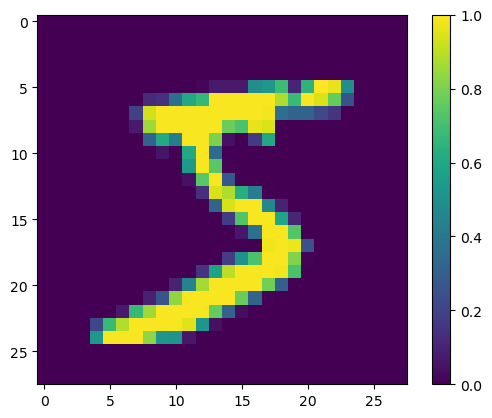

In [49]:
plt.figure()
plt.imshow(tf.reshape(x_train[0], (28,28)))
plt.colorbar()
plt.grid(False)
plt.show()

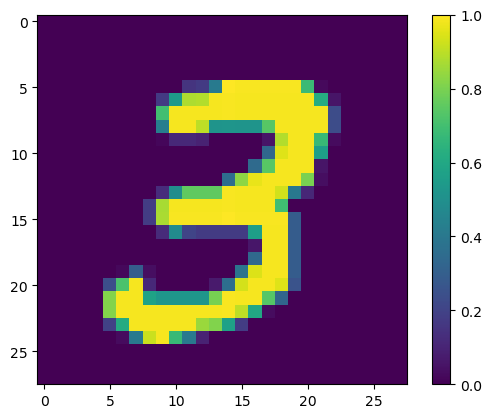

In [51]:
plt.figure()
plt.imshow(tf.reshape(x_train[7], (28,28)))
plt.colorbar()
plt.grid(False)
plt.show()

### 원시적인 방법으로 뉴럴네트워크 만들기

In [52]:
"""
h_1 = sigma(W_1x + b_1)
h_2 = sigma(W_2h_1 + b_2)
h_3 = sigma(W_3h_2 + b_3)

W_1 : (32 x 28) 32 -> 28
    W_1 * X = (32 x 28) x (28 x 10) = (32 x 10)
b_1 : (32)
    W_1 * X + b_1 = (32 x 10)
    
W_2 : (32 x 128) 
b_2 : (128)

W_3 : (128 x 256) 
b_3 : (256)

sigma = ReLU activation
   
"""

'\nh_1 = sigma(Wx + b)\nh_2 = sigma(Wh_1 + b)\nh_3 = sigma(Wh_2 + b)\n\n'

In [ ]:
def neural_net(x):
    # 어떤 텐서를 만들어 달라~ 그리고 그걸 variable로 선언해서 W1에 저장
    W1 = tf.Variable(tf.random_normal_initializer(stddev=1)([28,32])) 
    B1 = tf.Variable(tf.zeros([32]))
    
    W2 = tf.Variable(tf.random_normal_initializer(stddev=1)([32,128])) 
    B2 = tf.Variable(tf.zeros([128]))
    
    W3 = tf.Variable(tf.random_normal_initializer(stddev=1)([128,256])) 
    B3 = tf.Variable(tf.zeros([256]))
    
    h1 = tf.matmul(x, W1) + B1
    h1 = tf.nn.relu(h1)
    
    h2 = tf.matmul(h1, W2) + B2
    h2 = tf.nn.relu(h2)
    
    h3 = tf.matmul(h2, W3) + B3
    h3 = tf.nn.relu(h3)
    

In [54]:
from tensorflow.keras import Model, layers

In [55]:
class NeuralNet(Model): # Model이라는 CLASS를 상속받음 = Keras에서 지원하는거
    def __init__(self): # 그 뉴럴 네트워크가 어케 생겼는지 정의함
        super(NeuralNet, self).__init__()
        num_classes = 10
        self.fc1 = layers.Dense(128, activation=tf.nn.relu)
        self.fc2 = layers.Dense(256, activation=tf.nn.relu)
        self.out = layers.Dense(num_classes)
        
    def call(self, x, is_training=False): #그 뉴럴 네트워크가 어케 작동하는지 알려줌
        h1 = self.fc1(x)
        h2 = self.fc2(h1)
        h3 = self.out(h2)
        if not is_training: # 만약 is_training을 하지 않을 때는
            h3 = tf.nn.softmax(h3) # softmax를 거쳐라
        return h3
    
neural_net = NeuralNet()

In [ ]:
"""
loss function : cross entropy p(x)logq(x)

accuracy

"""

In [59]:
def cross_entropy_loss(x, y):
    y = tf.cast(y, tf.int64) 
    loss = tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits = x)
    return tf.reduce_mean(loss)

def accuracy(y_pred, y_true):
    # y_pred (data 개수, 10) (0.1, 0.5, 0.01 ...)
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    # 몇 개나 맞췃는지에 대한 평균
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


In [60]:
lr = 0.003
optimizer = tf.optimizers.SGD(lr)

def run_optimization(x, y):
    with tf.GradientTape() as g:
        pred = neural_net(x, is_training = True)
        loss = cross_entropy_loss(pred, y)
    
    trainable_variables = neural_net.trainable_variables
    gradients = g.gradient(loss, trainable_variables) 
    optimizer.apply_gradients(zip(gradients, trainable_variables)) 
    #계산된 gradients를 이용해서 lr만큼 trainable_variables를 업데이트 해주겟다
        

In [61]:
batch_size = 200
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train)) # 데이터셋으로 만들어주겟다
train_data = train_data.shuffle(60000).batch(batch_size).prefetch(1) 

epoch = 40
display_epoch = 4

for epo in range(1, epoch+1):
    for step, (batch_x, batch_y) in enumerate(train_data, 1):
        run_optimization(batch_x, batch_y)
    
    if epo % display_epoch == 0:
        pred = neural_net(batch_x)
        loss = cross_entropy_loss(pred, batch_y)
        acc = accuracy(pred, batch_y)
        print("epoch: ", epo, "loss : ", loss.numpy(), "acc :", acc.numpy())

epoch:  4 loss :  1.9015644 acc : 0.795
epoch:  8 loss :  1.7222626 acc : 0.87
epoch:  12 loss :  1.7047851 acc : 0.855
epoch:  16 loss :  1.6549308 acc : 0.89
epoch:  20 loss :  1.6234397 acc : 0.895
epoch:  24 loss :  1.6024007 acc : 0.93
epoch:  28 loss :  1.6041342 acc : 0.93
epoch:  32 loss :  1.5788869 acc : 0.94
epoch:  36 loss :  1.5767429 acc : 0.93
epoch:  40 loss :  1.5787011 acc : 0.93


In [62]:
pred = neural_net(x_test)
print("Test ACC : ", accuracy(pred, y_test).numpy())

Test ACC :  0.9273


In [63]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [64]:
# 모델을 어케 학습시킬건지에 대해 선언하는거 
model2.compile(optimizer='SGD', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

In [65]:
inform = model2.fit(x_train, y_train, batch_size=128, epochs=40)

2023-06-16 17:17:59.097155: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-06-16 17:17:59.116161: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2600000000 Hz


Epoch 1/40
469/469 [==============================] - 2s 4ms/step - loss: 1.8304 - accuracy: 0.5144
Epoch 2/40
469/469 [==============================] - 2s 4ms/step - loss: 0.5864 - accuracy: 0.8538
Epoch 3/40
469/469 [==============================] - 2s 4ms/step - loss: 0.4197 - accuracy: 0.8849
Epoch 4/40
469/469 [==============================] - 2s 4ms/step - loss: 0.3533 - accuracy: 0.9021
Epoch 5/40
469/469 [==============================] - 2s 4ms/step - loss: 0.3247 - accuracy: 0.9085
Epoch 6/40
469/469 [==============================] - 2s 4ms/step - loss: 0.2984 - accuracy: 0.9153
Epoch 7/40
469/469 [==============================] - 2s 4ms/step - loss: 0.2876 - accuracy: 0.9179
Epoch 8/40
469/469 [==============================] - 2s 4ms/step - loss: 0.2607 - accuracy: 0.9257
Epoch 9/40
469/469 [==============================] - 2s 4ms/step - loss: 0.2592 - accuracy: 0.9251
Epoch 10/40
469/469 [==============================] - 2s 4ms/step - loss: 0.2414 - accuracy: 0.9309